In [15]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

np.random.seed(10)
import chardet

with open('C:/Users/Инна/Desktop/otus/Sample - Superstore.csv', 'rb') as f:  # Открываем файл в бинарном режиме
    result = chardet.detect(f.read())

print(result)  # Выведет информацию о кодировке, например, {'encoding': 'Windows-1252', 'confidence': 0.99}

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [16]:
df = pd.read_csv('C:/Users/Инна/Desktop/otus/Sample - Superstore.csv', encoding='Windows-1252')

In [17]:
df.shape

(9994, 21)

In [5]:
#определим целевые признаки
#обработать пропуски
#определить проблему и можно ли ее решить с пом ML

In [6]:
pd.set_option('display.precision', 2)

In [23]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.91
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.58
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.87


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [11]:
for col in df.columns:
    if not 'no' in col and not 'ID' in col:
        un_n = df[col].nunique()
        print(f'no of unique {col}: {un_n}')

no of unique Order Date: 1237
no of unique Ship Date: 1334
no of unique Ship Mode: 4
no of unique Customer Name: 793
no of unique Segment: 3
no of unique Country: 1
no of unique City: 531
no of unique State: 49
no of unique Postal Code: 631
no of unique Region: 4
no of unique Category: 3
no of unique Sub-Category: 17
no of unique Product Name: 1850
no of unique Sales: 5825
no of unique Quantity: 14
no of unique Discount: 12
no of unique Profit: 7287


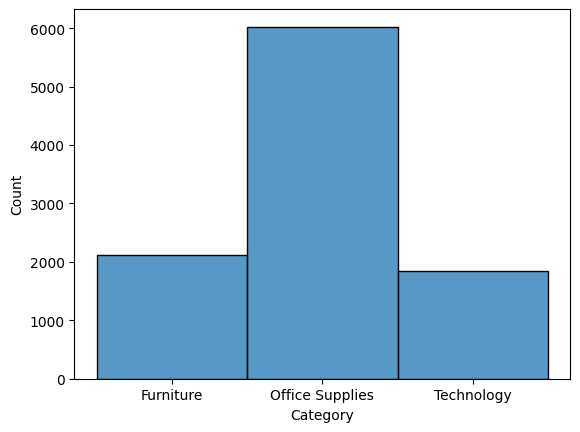

In [54]:
sns.histplot(df['Category'].dropna());

In [44]:
# f, ax = plt.subplot(figsize=(15, 7))
df_sorted_sub_cat = df['Sub-Category']
df_profit = df.sort_values(['Profit'])
ax = ax.barh(df_sorted_sub_cat,df_profit, color = 'r')

# envelopes - конверты
#labels - этикетки
#Ship Mode - способ доставки

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (9994, 21) and arg 3 with shape (9994,).

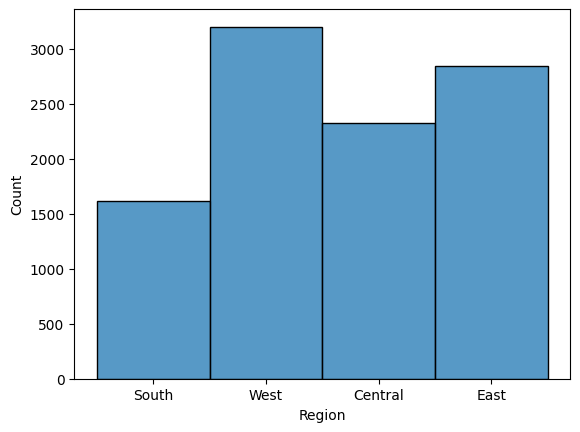

In [56]:
sns.histplot(df['Region'].dropna());

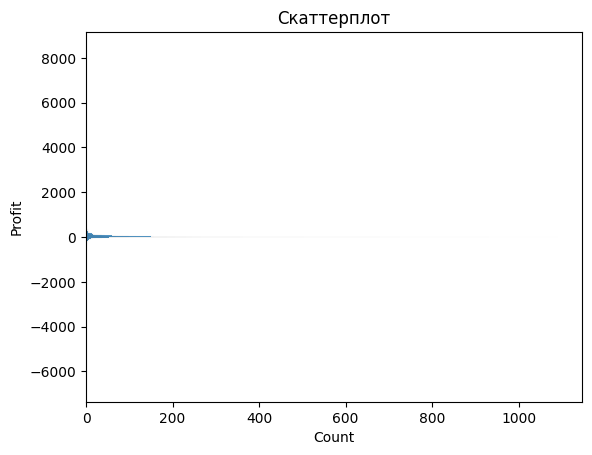

In [39]:
sns.histplot(data = df, y = df['Profit'],);
# 3. Добавляем подписи осей и заголовок (необязательно, но рекомендуется)
# plt.xlabel("Ось X")
# plt.ylabel("Ось Y")
plt.title("Скаттерплот")

# 4. Отображаем график
plt.show() # Вне Jupyter Notebook может потребоваться plt.show()

In [11]:
df.isna().any()

Row ID           False
Order ID         False
Order Date       False
Ship Date        False
Ship Mode        False
Customer ID      False
Customer Name    False
Segment          False
Country          False
City             False
State            False
Postal Code      False
Region           False
Product ID       False
Category         False
Sub-Category     False
Product Name     False
Sales            False
Quantity         False
Discount         False
Profit           False
dtype: bool

In [12]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000
